In [ ]:
# Import dependencies

In [ ]:
#!pip install tensorflow

In [ ]:
#!pip install tensorflow==2.2.0

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

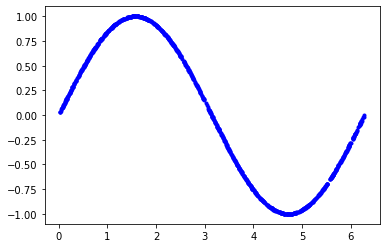

In [ ]:
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this notebook
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformy distributed set of random numbers in the range from
# 0 to 2n, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to quarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data. The 'b. ' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b. ')
plt.show()

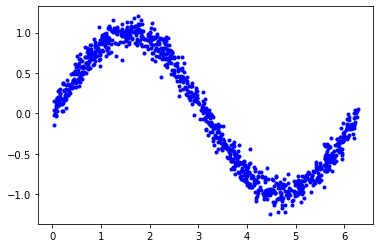

In [ ]:
# add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b. ')
plt.show()

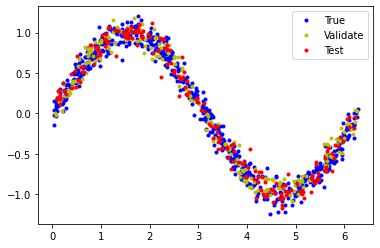

In [ ]:
# We' ll use 60% of our data for trainig and 20% for testing. 20% for validation
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b. ', label="True")
plt.plot(x_validate, y_validate, 'y. ', label="Validate")
plt.plot(x_test, y_test, 'r. ', label="Test")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The neurons decide whether
# activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training 
history_1 = model_1.fit(x_train, y_train, epochs = 1000, batch_size=16,
                        validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 7ms/step - loss: 6.3079 - mae: 1.9409 - val_loss: 4.8960 - val_mae: 1.7436
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 3.8997 - mae: 1.5611 - val_loss: 3.0614 - val_mae: 1.4294
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 2.4346 - mae: 1.2835 - val_loss: 1.9465 - val_mae: 1.2015
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 1.5362 - mae: 1.0750 - val_loss: 1.2218 - val_mae: 1.0045
Epoch 5/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.9885 - mae: 0.9002 - val_loss: 0.8255 - val_mae: 0.8495
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.7166 - mae: 0.7769 - val_loss: 0.6477 - val_mae: 0.7421
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5905 - mae: 0.6910 - val_loss: 0.5604 - val_mae: 0.6706
Epoch 8/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.

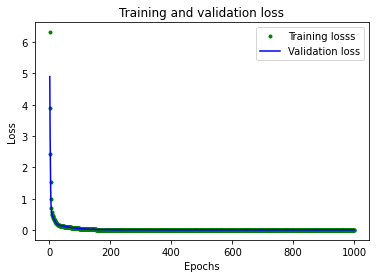

In [ ]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g. ', label='Training losss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

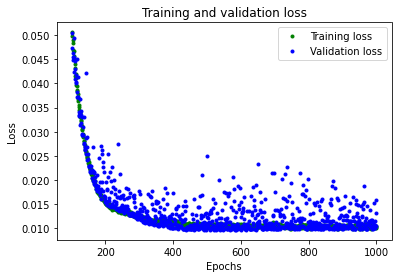

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g. ', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

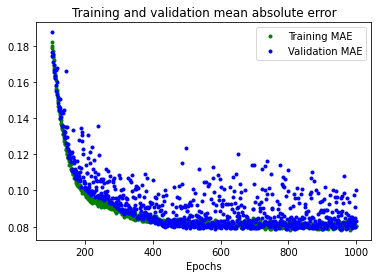

In [ ]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g. ', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b. ', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.legend()
plt.show()

19/19 [==============================] - 0s 1ms/step


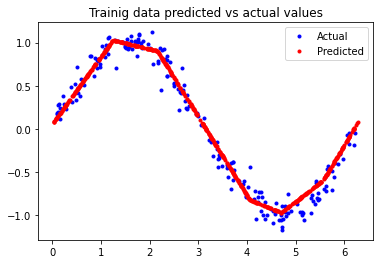

In [ ]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

# Plot the predictions along with the test data
plt.clf()
plt.title('Trainig data predicted vs actual values')
plt.plot(x_test, y_test, 'b. ', label='Actual')
plt.plot(x_train, predictions, 'r. ', label='Predicted')
plt.legend()
plt.show()

In [ ]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The 
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Show a summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
                        validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 2s 14ms/step - loss: 0.5408 - mae: 0.6549 - val_loss: 0.4416 - val_mae: 0.5821
Epoch 2/600
38/38 [==============================] - 0s 8ms/step - loss: 0.3925 - mae: 0.5378 - val_loss: 0.3547 - val_mae: 0.5126
Epoch 3/600
38/38 [==============================] - 0s 3ms/step - loss: 0.3118 - mae: 0.4756 - val_loss: 0.2838 - val_mae: 0.4591
Epoch 4/600
38/38 [==============================] - 0s 4ms/step - loss: 0.2530 - mae: 0.4299 - val_loss: 0.2327 - val_mae: 0.4198
Epoch 5/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2067 - mae: 0.3915 - val_loss: 0.1967 - val_mae: 0.3934
Epoch 6/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1740 - mae: 0.3611 - val_loss: 0.1738 - val_mae: 0.3664
Epoch 7/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1574 - mae: 0.3428 - val_loss: 0.1599 - val_mae: 0.3539
Epoch 8/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1482 - 

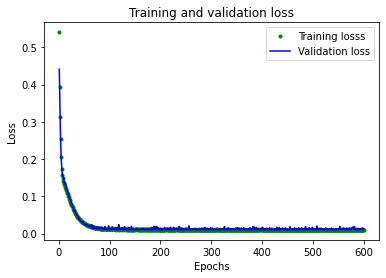

In [ ]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g. ', label='Training losss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

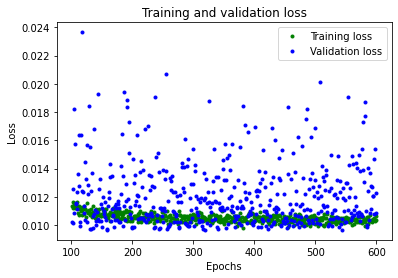

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g. ', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

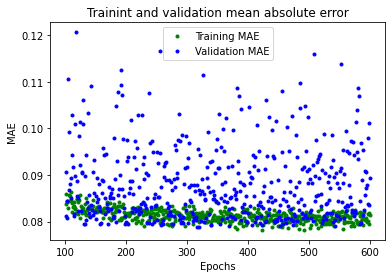

In [ ]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']



plt.plot(epochs[SKIP:], mae[SKIP:], 'g. ', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b. ', label='Validation MAE')
plt.title('Trainint and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step


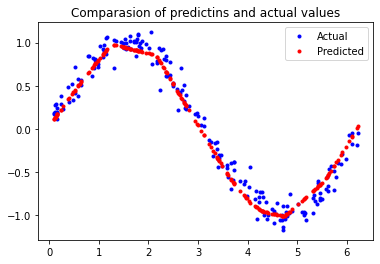

In [ ]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)

# Make prediction based on our test dataset
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparasion of predictins and actual values')
plt.plot(x_test, y_test, 'b. ', label='Actual')
plt.plot(x_test, predictions, 'r. ', label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perfom the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it

def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("sine_model_quantized", "wb").write(tflite_model)

/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


2976